# **Caveat: **

**This is a demo and illustration of the use of Python/Jupyter Notebook in our module. It is definitely *incomplete* as far as the Python language is concerned**


This program plots out the iterates of the Logistic Map.  

The Logistic map is given by

$x_{n+1}=\alpha\,x_n(1-x_n),\quad n=0, 1,2,3, \dots$.  

$x_0$ is the initial value.

# In a Python notebook, which we are using now, there are two primary types of cells (the space in which you type): 
1. **Markdown** cell
2. **Code** cell

Python only formats the content (i.e. makes it look 'nicer') in the **Markdown** cell, but will ***execute*** the content of the **Code** cell.  

Each code (markdown) cell can be executed (formatted) in real time one at a time: click the cursor on the cell, and select *Run Cells* from the drop down of *Cell* at the top of the notebook page, and Python will execute only the codes in that cell.  This is useful when we want to check a portion of our code/program and verify that it is doing what we want it to (i.e. "debugging").

The default cell type is *Code*.  You can change the cell type to be *Markdown* by clicking on the drop-down panel on the top of the notebook (where it usually say **Code** when you first start the notebook) and choosing **Markdown**.

The first few cells in this notebook are all *Markdown* cells.  These cells are meant for annotating your code, provide the narrative of the problem formulation, and explain the approach and/or strategy in trying to reach a solution.  They allow for more than just brief comments, which can already be incorporated in the code cells.

**Including brief comments in the code cells:**    
Python provides a way to have brief comments in the code cells - **whatever that follows a # symbol is ignored in the execution**, and Python will just proceed onto the next new line.  This could be useful in reminding ourselves what the variable is and why a specific value is assign, etc. within the code, so that the code is clearer to someone else, or even to the original coder coming back to the code after some time.

For variations and tags (e.g. how to mark text bold, etc.), check out
https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed


We will also be using this program to introduce the elements of Python programming.  

First to note is that Python is a lean and mean programming system.  When you start up a Python notebook,
the basic Python machinery is immediately available.  But for our purposes, we often will need to use
some graphic/plotting routines that will allow us to visualize our computed results

In Python, this is in **package**  ***matplotlib***, so we need to *import* the package before we used
them.

A few things to note:
1. It can also be the case that we need only a subset of these packages, and here in the next cell, we only request the subpackage ***pyplot*** of *matplotlib* to be imported.
2. After we import the package, we will still refer to it when we explicitly make use of the functions in the package.  To help with this reference, we can define a short-hand for a package when we import them.  In the first 2 lines in the next cell, we create the short-hand *plt* for *matplotlib.pyplot*.

Finally, in some operating systems, the *matplotlib* plotting routines create the figures we ask them to plot as separate figures and display them on the computer screen, outside the Python notebook we are using.  For our purposes here, we really would like to have the figures as part of the notebook, so that when we save the notebook, the figures/plots are also saved.
The line ***%matplotlib inline*** is the needed instruction.

In [1]:
# Import plotting routines
# pyplot is a subpackage with the plotting package called matplotlib
import matplotlib.pyplot as plt  # from now on we use plt to refer to this package

# We want to plot figures in the notebook rather than as a separate figures on computer screen.
# The next line tells Python to do just that - note that it starts with the % sign.
# This line may not be needed for some operating systems, but doesn't hurt to include.
%matplotlib inline

1. **Arrays or Lists**

*There are differences between an Array and a List in Python.  You may want to check this out:*

https://academy.vertabelo.com/blog/python-array-vs-list/#:~:text=Arrays%20can%20store%20data%20very,just%20one%20line%20of%20code.


In addition to a variable that only hold one numerical value at a time, we can also have variable that holds more than one values.  There are 2 ways to do that: 

(a) A **array** or a **list** that can hold up to $k$ values.  

(b) a **list** that can hold an arbitrary number of values, increasing the size whenever needed.

We will need a way to refer to a specific value (= element) of the variable.  In Python, we use an identifier (index), an integer that starts from 0 (zero), and going through 1, 2, 3, ... 
So, if we define the variable

x = [3.4, 4.1, 0.5]

x[0] has the value 3.4, x[1] has the value 4.1, and x[2] 0.5. Each of these acts as if they are standalone single-valued variables.

You can also declare an empty array/list:

y = [ ]

and later add elements to it through

y.append(0.4) (which will give y as [0.4] )

or 

y.append(x[2]) (which gives y as [0.5] )

Subsequent *append* will simply add elements to the list:

y = [ ]

y.append(3.4)

y.append(4.1)

y.append(0.5)

will give us the resultant array/list 

[3.4, 4.1, 0.5]

Python allows a **mathematical function** to be defined - this is useful when our computation requires many evaluations of that function.  This is like the **sin** button on our electronic calculators: we type in a value (say x), punch the button and we get the **sin(x)**. This works the same way for a Python **user-defined function**: it will need an input, and calling the function is like pressing the button on the calculator.

The definition of a user-defined function in Python follows a specific format:
1. it starts with the reserved word **def** (this means we **cannot** use **def** as the name of a variable in our codes).
2. it is then followed by the *name* of the function - this can be any name just like a variable.
3. the function will have to be provided with the *input(s)* we referred to above - there can be more than one input value; and to cater for the computational progression of the code, with different values being provided as input to the function, the *variable(s)* and *parameter(s)* with their up-to-date values are sent to the function.  These are done with brackets in front of and after these variables, with each of the variables separated by comas.
4. finally, the function must *return* the value(s) (like displaying the value of sin(x) on the calculator) with the (again) reserved word **return**

The next cell illustrates how the Logistic map function $f(x)=\alpha x(1-x)$ is defined: the function is named **logistic**, with input variable values **(r, y)**, and returns the value that is the result of the arithmetic operations **r * y * (1 - y)**.

In [2]:
# This defines a function (called logistic here), which takes one variable value
# (y here), and returns the function value
def logistic(r, y):
    return r * y * (1 - y)

Now we are ready to **iterate** the logistic map.  The iterative process involves the following steps:
1. Take an initial value of x - i.e. $x_0$.
2. Evaluate f(x_0), where f is the logistic map function.  Call the result $x_1$.
3. Repeat step 2. above except with $x_1$ to obtain $x_2$.
4. The repetition is carried out for say $N$ times.
5. We then have a **series** of values $[x_0, x_1, x_2, \cdots, x_N]$.


Well, Python provides a even simpler solution: the **for** loop - the first line in the next code cell

**for** n in range(0, N):

- the reserved word **for** and the semi-colon **:** initiate a *loop* (i.e. repetition), and between them is the condition to check to decide whether to continue the repetition.
- here the condition is **n in range(0, N)**.  
    - **n** is variable name (even though in this case it has not be initialized to any value)
    - **range(0, N)** is probably clear: the range of values (in this case integer values) between 0 and N (excluding N)  
  So in words, this means the instruction *for as long as n is in the range between 0 and N, execute what follows after the colon :  

[Generalizing: we can have range(a, b), where $b > a$ are both integers.]
   
What comes after the **:** is to be executed as long as the specified condition is satisfied.  These steps to be executed are *indented* (automatically so after we type in the : and press enter to go onto the next line in the code cell). 

A line that is back to the original alignment is NOT part of the loop.

Now that we have the for loop in our hands, we shall figure out how to iterate the logistic map.

We need an initial value of x.  That's easy.  But we also need to **remember** (or **store** in programming jargon) all the values of the iterates, so that we can plot time to see the features of the variation.  An ordinary variable in Python stores only one value; what we need is something to store a **string** or **series** of values.  

One of the ways to do it in Python is to declare an **array** with a certain number *k* of storage places. Let us name that array **MyArray**. Each element (storage place) of this array is reference with an integer index: MyArray[5], MyArray[11], etc.  The thing to note is that in Python, the reference index starts from **0**, so we have MyArray[0], MyArray[1], ..., MyArray[k-1], but not MyArray[k].  There are still *k* elements, just that they are not labelled/referenced 1 to 10, but 0 - 9.

The code in the next cell carries out the iteration, from $n=1$ to $n=N$, giving us the set of $x_1, x_2, ..., x_N\,$ from the computation.

In [3]:
# Simulation parameters
#
# Control parameter of the map
a = 1.6

# Set up an array of iterates and set the initital condition
# x is then a array containing only one item, which is the
# initial value x0
x = [0.2]

# The number of iterations to generate
N = 1000

# transients to discard
transients = 950

# The main loop that generates iterates by calling the logistic function 
# and stores the new iterated value
for n in range(1, N+1): # recall from above that if we use range(1, N), x[N] would not be computed
    x.append(logistic(a, x[n-1]))


The next cell sets up and displays the (time series) results in a graph.

Introduction to Data Visualization in Python, (Matplotlib portion)      
https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed

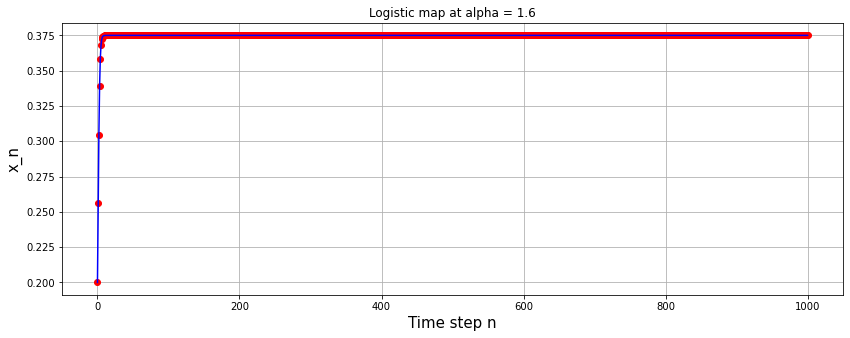

In [4]:
# Setup the plot
plt.figure(figsize=(14,5))  # this sets up the size of the plot
plt.xlabel('Time step n', fontsize=15) # set x-axis label
plt.ylabel('x_n', fontsize=15) # set y-axis label.
plt.title('Logistic map at alpha = ' + str(a)) # set plot title
plt.grid() # turn on the grid

# Plot the time series: once with red (r) circles (o), once with blue (b) lines
plt.plot(x, 'ro', x , 'b')

# Display the plot in a window
plt.show()

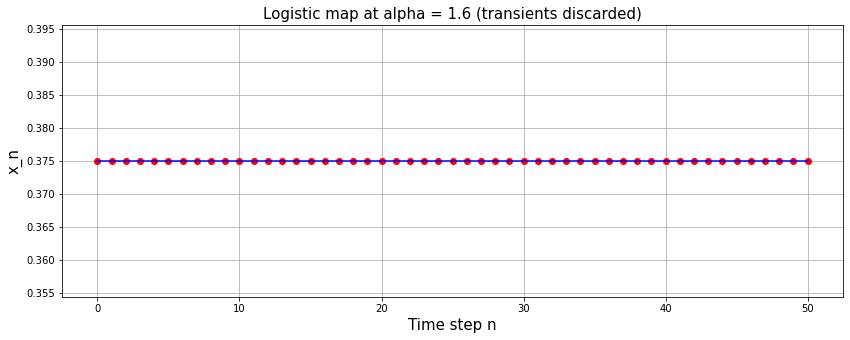

In [5]:
# Setup the plot
# set the plot size: here 14 (horizontal) by 5 (vertical) units
plt.figure(figsize=(14,5))
# set x-axis label
plt.xlabel('Time step n', fontsize=15)
# set y-axis label
plt.ylabel('x_n', fontsize=15) 
# set plot title
plt.title('Logistic map at alpha = ' + str(a) + ' (transients discarded)', fontsize=15)

plt.grid()

# pick only those iterates after the transients to plot
y = x[transients:]
plt.plot(y, 'ro', y, 'b')

plt.show()

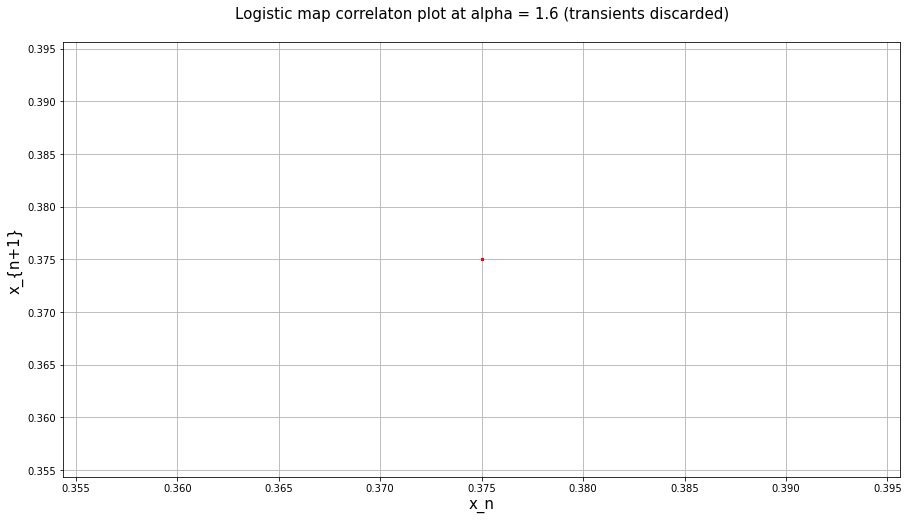

In [6]:
# correlation plot: x_n vs. x_(n+1)
plt.figure(figsize=(15,8))
plt.xlabel('x_n', fontsize=15)
plt.ylabel('x_{n+1}', fontsize=15)
plt.title('Logistic map correlaton plot at alpha = ' + str(a) + ' (transients discarded)' + '\n ', fontsize=15) 
plt.grid()

y1 = x[transients:N-2]
y2 = x[transients+1:N-1]
y3 = x[transients+2:N]
plt.plot(y1, y2, 'ro', markersize=1)  # the markersize is the size of the dot/circles
plt.show()

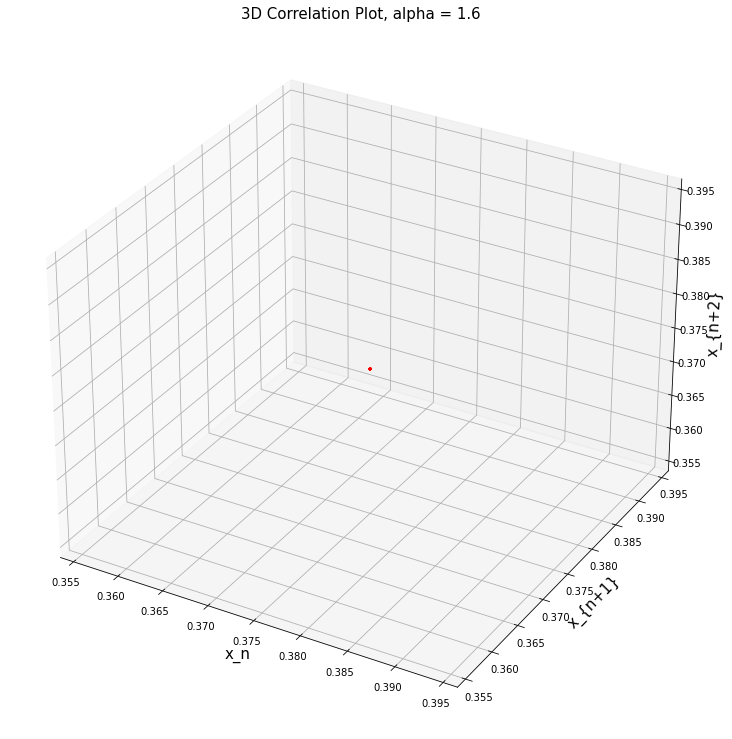

In [7]:
# Correlations between x_n, x_{n+1} and x_{n+2}

from mpl_toolkits.mplot3d import Axes3D   # library for 3D plots

fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(y1, y2, y3, c='r', marker='o', s=3)
ax.set_title('3D Correlation Plot, alpha = ' + str(a), fontsize=15)

ax.set_xlabel('x_n', fontsize=15)
ax.set_ylabel('x_{n+1}', fontsize=15)
ax.set_zlabel('x_{n+2}', fontsize=15)
plt.show()

Now we check the sensitivity to the initial conditions.  

We will compute two sequences of $x$, with slightly different initial conditions.

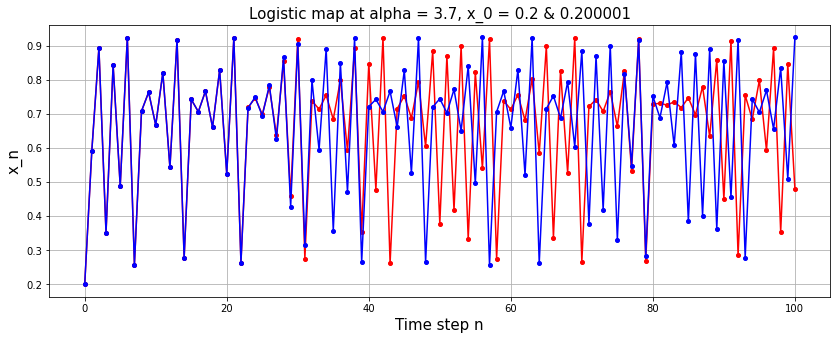

In [8]:
x1 = [0.2]
x2 = [0.200001]
N = 100
a = 3.7

for n in range(0, N):
    x1.append( logistic(a, x1[n]) )
    x2.append( logistic(a, x2[n]) )

# Setup the plot
plt.figure(figsize=(14, 5))
plt.xlabel('Time step n', fontsize=15) # set x-axis label
plt.ylabel('x_n', fontsize=15) # set y-axis label
# set plot title
plt.title('Logistic map at alpha = ' + str(a) + ', x_0 = ' + str(x1[0]) + ' & ' + str(x2[0]), fontsize=15) 
plt.grid(True)

# Plot the time series: once with circles, once with lines
plt.plot(x1, 'ro', x1, 'r', x2, 'bo', x2, 'b', markersize=4)

# Display the plot in a window
plt.show()



Next we explore sensitivity to the system parameter $\alpha$, by computing two sequences of $x$ with two slightly different values of $\alpha$, but the same $x_0$.

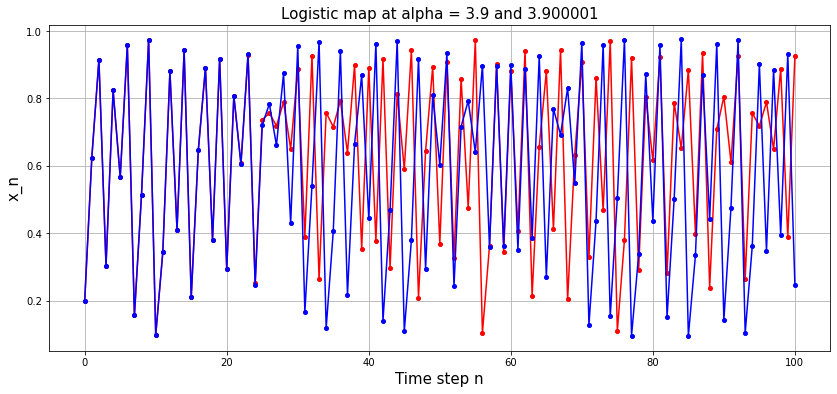

In [9]:
x1 = [0.2]
x2 = [0.2]
N = 100
a1 = 3.9
a2 = 3.900001

for n in range(0, N):
    x1.append( a1*x1[n]*(1-x1[n]) )
    x2.append( a2*x2[n]*(1-x2[n]) )

# Setup the plot
plt.figure(figsize=(14, 6))
plt.xlabel('Time step n', fontsize=15) # set x-axis label
plt.ylabel('x_n', fontsize=15) # set y-axis label
plt.title('Logistic map at alpha = ' + str(a1) + ' and ' + str(a2), fontsize=15) # set plot title
plt.grid(True)

# Plot the time series: once with circles, once with lines
plt.plot(x1, 'ro', x1, 'r', x2, 'bo', x2, 'b', markersize=4)

# Display the plot in a window
plt.show()